# Aprendizado: definindo a função perda

## O objetivo é avaliar o impacto de diferentes funções de perda em problemas de regressão e classificação binária e multiclasse. 

## Importando as bibliotecas

In [1]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot as plt

## Criando o conjunto de treino e teste

In [2]:
def create_dataset():
    X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
    
    # z = (x - u) / s 
    X = StandardScaler().fit_transform(X)
    y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]
    
    # divisão treino/teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle = True, random_state=42)
    return X_train, y_train, X_test, y_test

In [3]:
X_train, y_train, X_test, y_test = create_dataset()

In [4]:
print(X_train.shape,y_train.shape, X_test.shape, y_test.shape)

(700, 20) (700,) (300, 20) (300,)


## Treinando e avaliando o modelo p/ Regressão

## Função de ativação

![title](linear_function.png)

## Função de perda: MSE, MAE e MSLE

![title](msemae.png)

![title](msle.png)

In [5]:
def model_training(X_train, y_train, X_test, y_test):

    n_input= X_train.shape[1]
    
    # definindo a arquitetura do modelo 
    model = Sequential()
    model.add(Dense(25, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='linear'))
    
    # Compilando e treinando o modelo
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])
    history = model.fit(X_train, y_train, epochs=80, validation_data=(X_test, y_test), verbose=0)
    return model, history

In [6]:
def model_evaluation(model,X, y):
    mse = model.evaluate(X, y, verbose=0)
    return mse

## Avaliando o modelo

Treino: 0.285, Teste: 0.337


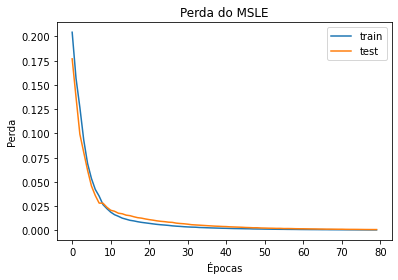

In [7]:
model, history = model_training(X_train, y_train, X_test, y_test)
_,train_mse = model_evaluation(model,X_train, y_train)
_, test_mse = model_evaluation(model,X_test, y_test)
    
# exibe a acurácia de teste do modelo para cada largura do modelo
print('Treino: %.3f, Teste: %.3f' % (train_mse, test_mse))

# plota a curva da perda ao longo das épocas de treino
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Perda do MSLE')    
plt.legend()
plt.show()

## Classificação Binária 

In [8]:
from sklearn.datasets import make_circles
from numpy import where
from keras.utils import to_categorical
import itertools

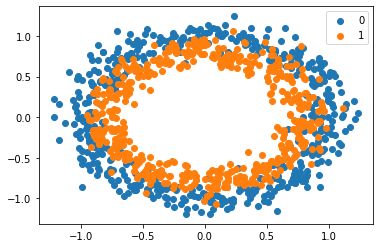

In [9]:
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
for i in range(2):
    samples_ix = where(y == i)
    plt.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
plt.legend()
plt.show()

In [10]:
def create_dataset_bin():
    X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
    
    # one hot encode
    y_categorical = to_categorical(y)
    
    # divisão treino/teste
    X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.30, shuffle = True, random_state=42)
    return X_train, y_train, X_test, y_test

In [20]:
def model_training(activation,loss,X_train, y_train, X_test, y_test):

    n_input, n_output= X_train.shape[1],y_train.shape[1]
    
    # definindo a arquitetura do modelo 
    model = Sequential()
    model.add(Dense(25, input_dim=n_input, activation="relu", kernel_initializer='he_uniform'))
    model.add(Dense(n_output, activation=activation))
    
    # Compilando e treinando o modelo
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), verbose=0)
    return model, history

In [12]:
def model_evaluation(model,X, y):
    _, acc = model.evaluate(X, y, verbose=0)
    return acc

## Funções de ativação: sigmoid (logistic ou soft step) e tanh (Hyperbolic tangent)

![title](sigmoid.svg)      ![title](tanh.svg)

![title](sigmoid_tanh.jpeg)

## Funções de Perda 

### Binary Crossentropy

![title](entropia.png)

![title](binary_cross_entropy_new.png)

![title](binary_cross_entropy_mean.png)

### Hinge

![title](hinge_loss.svg)

![title](hinge_hinge_squared.png)

Loss=binary_crossentropy; Activation=sigmoid; Acc: 0.867
Loss=hinge; Activation=sigmoid; Acc: 0.870
Loss=squared_hinge; Activation=sigmoid; Acc: 0.520


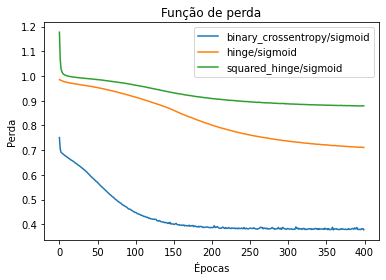

In [13]:
X_train, y_train, X_test, y_test = create_dataset_bin()
loss =['binary_crossentropy','hinge','squared_hinge']
#activation_function=['sigmoid','tanh']
activation_function=['sigmoid']

for l, a in itertools.product(loss, activation_function):
    # evaluate model with a given number of nodes
    model, history = model_training(a,l, X_train, y_train, X_test, y_test)
    test_acc = model_evaluation(model,X_test, y_test)
    
    # exibe a acurácia de teste do modelo para cada largura do modelo
    print('Loss=%s; Activation=%s; Acc: %.3f' % (l, a, test_acc))
    # plota a curva de aprendizado para cada nó
    plt.plot(history.history['loss'], label=l+'/'+a)

plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Função de perda')    
plt.legend()
plt.show()

## Classificação Multiclasse

In [23]:
from sklearn.datasets import make_blobs
from numpy import where
import matplotlib.pyplot as plt
from keras.utils import to_categorical

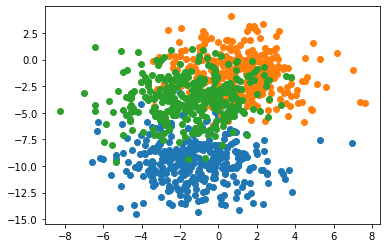

In [24]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
for i in range(3):
    samples_ix = where(y == i)
    plt.scatter(X[samples_ix, 0], X[samples_ix, 1])
plt.show()

In [25]:
def create_dataset_multi():
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    
    # one hot encode
    y_categorical = to_categorical(y)
    
    # divisão treino/teste
    X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.30, shuffle = True, random_state=42)
    return X_train, y_train, X_test, y_test

![title](cross_entropy.png)

![title](KL_divergence.png)

![title](softmax.png)

Loss=categorical_crossentropy; Activation=softmax; Acc: 0.837
Loss=kullback_leibler_divergence; Activation=softmax; Acc: 0.840


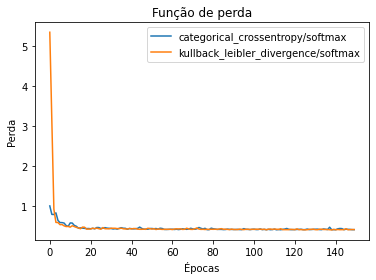

In [26]:
X_train, y_train, X_test, y_test = create_dataset_multi()

loss =['categorical_crossentropy','kullback_leibler_divergence']
activation_function=['softmax']

for l, a in itertools.product(loss, activation_function):
    # evaluate model with a given number of nodes
    model, history = model_training(a,l, X_train, y_train, X_test, y_test)
    test_acc = model_evaluation(model,X_test, y_test)
    
    # exibe a acurácia de teste do modelo para cada largura do modelo
    print('Loss=%s; Activation=%s; Acc: %.3f' % (l, a, test_acc))
    # plota a curva de aprendizado para cada nó
    plt.plot(history.history['loss'], label=l+'/'+a)

plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Função de perda')    
plt.legend()
plt.show()